# ---------------------HR Analytics----------------------------

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300)
pd. set_option('display.max_rows', 300) 

In [2]:
## Steps TODO

1) Understanding the problem

2) Data Reading

3) Preprocess the data

4) Train , validation and test split

5) EDA

6) Feature Engg

7) Feture Selection

8) Modelling

9) HPT

10) Accuracy


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
df.duplicated().sum()

0

## Preprocessing

#### Null Imputation

In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

<AxesSubplot:>

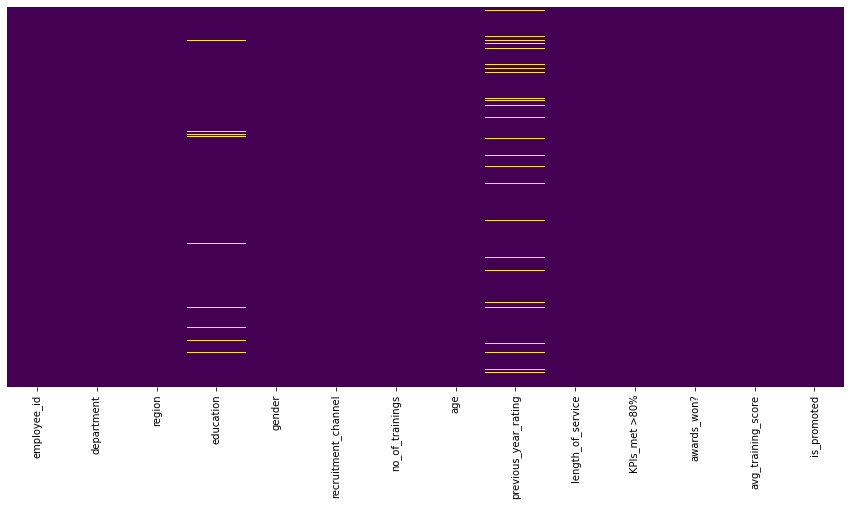

In [10]:
plt.subplots(figsize=(15, 7))
sns.heatmap(df.isnull(), yticklabels = False, cmap = "viridis" ,cbar = False )

From the above graph it can be seen that there are some null values in education and rating column. From the graph nulll values seem to be randomly distributed.

In [11]:
df[df.education.isnull() & df.previous_year_rating.isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
90,62658,Sales & Marketing,region_2,NaN,f,sourcing,1,20,NaN,1,0,0,55,0
245,24414,R&D,region_2,NaN,m,other,1,25,NaN,1,1,0,76,0
475,36691,Sales & Marketing,region_14,NaN,m,other,1,24,NaN,1,1,0,55,0
508,6788,Sales & Marketing,region_2,NaN,f,other,2,40,NaN,1,1,0,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53623,25935,Sales & Marketing,region_29,NaN,m,sourcing,1,27,NaN,1,0,0,54,0
53893,589,Sales & Marketing,region_14,NaN,m,other,2,24,NaN,1,0,0,47,0
53971,12248,Sales & Marketing,region_2,NaN,m,sourcing,1,27,NaN,1,0,0,53,0
53983,71684,Sales & Marketing,region_2,NaN,f,other,1,25,NaN,1,0,1,86,1


In [12]:
df[df.previous_year_rating.isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


It looks like the rating is null where the length of service is equals to one.So to comfirm this below I checked the rows where length of service is 1 and Rating is null.

In [13]:
df[df.length_of_service ==1 & df.previous_year_rating.isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


The result shows that all the null values in Rating column have corresponding length of  service equals to 1. It can that these all are freshers and do not have any previous rating as they were not there in the past. Hence these values can be considered as MNAR(missing not at random)

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

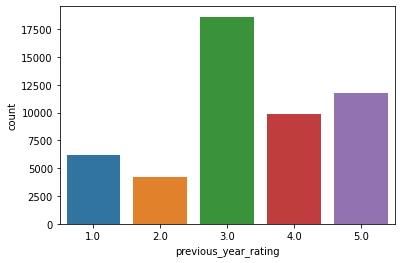

In [14]:
sns.countplot(x = 'previous_year_rating', data = df)

The mode is 3.0. I think the missing values should be replaced by 3.0 for one it is the mode and also it would be only fair to the freshers to give them neutral rating in the begining.

In [15]:
df2 = df.fillna({'previous_year_rating': 'New_employees'})
df2.previous_year_rating.value_counts()

3.0              18618
5.0              11741
4.0               9877
1.0               6223
2.0               4225
New_employees     4124
Name: previous_year_rating, dtype: int64

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

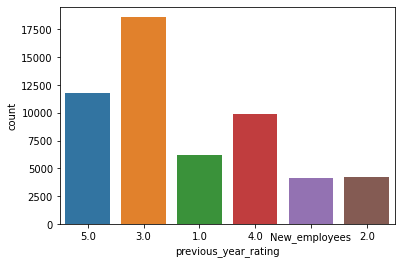

In [16]:
sns.countplot(x = 'previous_year_rating', data = df2)

In [17]:
df2.groupby([ "previous_year_rating", "is_promoted" ])["is_promoted"].count().to_frame()

is_promoted
previous_year_rating is_promoted             
1.0                  0                   6135
                     1                     88
2.0                  0                   4044
                     1                    181
3.0                  0                  17263
                     1                   1355
4.0                  0                   9093
                     1                    784
5.0                  0                   9820
                     1                   1921
New_employees        0                   3785
                     1                    339

In [18]:
pd.crosstab(df2["previous_year_rating"],df2["is_promoted"]).apply(lambda r: (r/r.sum()).round(2), axis=1)



is_promoted,0,1
previous_year_rating,,
1.0,0.99,0.01
2.0,0.96,0.04
3.0,0.93,0.07
4.0,0.92,0.08
5.0,0.84,0.16
New_employees,0.92,0.08


The above steps were just to check if null replacement is causing some drastic change in the dataset.

In [19]:
del df2

In [20]:
#To keep track of freshers
df.loc[df.previous_year_rating.isna() , 'Fresher'] = 1 

In [21]:
df.fillna({'previous_year_rating': 3.0, 'Fresher' : 0}, inplace = True)


In [22]:
#Now moving to education column
df[df.education.isnull()].head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Fresher
10,29934,Technology,region_23,NaN,m,sourcing,1,30,3.0,1,0,0,77,0,1.0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0,0.0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0,0.0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0,0.0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0,0.0
87,69094,Sales & Marketing,region_2,NaN,m,sourcing,1,39,1.0,9,0,0,49,0,0.0
90,62658,Sales & Marketing,region_2,NaN,f,sourcing,1,20,3.0,1,0,0,55,0,1.0
189,6254,Operations,region_2,NaN,f,other,1,33,4.0,9,0,0,64,0,0.0
204,60761,Operations,region_16,NaN,f,other,1,31,4.0,2,0,0,62,0,0.0
231,57235,Sales & Marketing,region_26,NaN,m,other,1,22,4.0,2,0,0,51,0,0.0


In [23]:
df.Fresher = df.Fresher.astype(int)

In [24]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Fresher
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [25]:
# To analyse if there's some pattern between null values
df_temp = df.fillna({'education': 'other'})

In [26]:
df_temp.groupby(['region' , 'education'])['education'].count().to_frame()

education
region    education                  
region_1  Bachelor's              339
          Below Secondary           1
          Master's & above        256
          other                    14
region_10 Bachelor's              251
          Master's & above        393
          other                     4
region_11 Bachelor's             1011
          Master's & above        280
          other                    24
region_12 Bachelor's              468
          Master's & above         30
          other                     2
region_13 Bachelor's             1716
          Below Secondary           4
          Master's & above        872
          other                    56
region_14 Bachelor's              637
          Below Secondary           1
          Master's & above        166
          other                    23
region_15 Bachelor's             1970
          Master's & above        647
          other                   191
region_16 Bachelor's             1099
          Below Secondary          37
          Master's & above        274
          other                    55
region_17 Bachelor's              577
          Master's & above        210
          other                     9
region_18 Bachelor's               31
region_19 Bachelor's              736
          Master's & above        128
          other                    10
region_2  Bachelor's             7247
          Below Secondary         482
          Master's & above       3768
          other                   846
region_20 Bachelor's              619
          Master's & above        230
          other                     1
region_21 Bachelor's              331
          Below Secondary           1
          Master's & above         71
          other                     8
region_22 Bachelor's             4308
          Below Secondary         111
          Master's & above       1689
          other                   320
region_23 Bachelor's              657
          Master's & above        490
          other                    28
region_24 Bachelor's              411
          Below Secondary           1
          Master's & above         95
          other                     1
region_25 Bachelor's              519
          Below Secondary           6
          Master's & above        260
          other                    34
region_26 Bachelor's             1806
          Below Secondary          17
          Master's & above        337
          other                   100
region_27 Bachelor's             1270
          Below Secondary          17
          Master's & above        288
          other                    84
region_28 Bachelor's              699
          Below Secondary           1
          Master's & above        534
          other                    84
region_29 Bachelor's              776
          Below Secondary           2
          Master's & above        197
          other                    19
region_3  Bachelor's              226
          Master's & above        118
          other                     2
region_30 Bachelor's              566
          Below Secondary           2
          Master's & above         76
          other                    13
region_31 Bachelor's             1421
          Below Secondary           5
          Master's & above        415
          other                    94
region_32 Bachelor's              811
          Below Secondary           3
          Master's & above         47
          other                    84
region_33 Bachelor's              201
          Master's & above         68
region_34 Bachelor's              252
          Master's & above         40
region_4  Bachelor's              892
          Master's & above        809
          other                     2
region_5  Bachelor's              584
          Below Secondary           6
          Master's & above        169
          other                     7
region_6  Bachelor's              653


In [27]:
df_temp.groupby(['department' , 'education'])['education'].count().to_frame()

education
department        education                  
Analytics         Bachelor's             3978
                  Master's & above       1037
                  other                   337
Finance           Bachelor's             1895
                  Below Secondary         106
                  Master's & above        499
                  other                    36
HR                Bachelor's             1525
                  Below Secondary         128
                  Master's & above        733
                  other                    32
Legal             Bachelor's              814
                  Below Secondary          65
                  Master's & above        156
                  other                     4
Operations        Bachelor's             7781
                  Below Secondary         176
                  Master's & above       3165
                  other                   226
Procurement       Bachelor's             4393
                  Below Secondary         129
                  Master's & above       2544
                  other                    72
R&D               Bachelor's              542
                  Master's & above        429
                  other                    28
Sales & Marketing Bachelor's            11099
                  Master's & above       4166
                  other                  1575
Technology        Bachelor's             4642
                  Below Secondary         201
                  Master's & above       2196
                  other                    99

In [28]:
df_temp.groupby(['recruitment_channel' , 'education'])['education'].count().to_frame()

education
recruitment_channel education                  
other               Bachelor's            20251
                    Below Secondary         418
                    Master's & above       8392
                    other                  1385
referred            Bachelor's              883
                    Below Secondary          39
                    Master's & above        212
                    other                     8
sourcing            Bachelor's            15535
                    Below Secondary         348
                    Master's & above       6321
                    other                  1016

In [29]:
df_temp.groupby(['no_of_trainings' , 'education'])['education'].count().to_frame()

education
no_of_trainings education                  
1               Bachelor's            29285
                Below Secondary         646
                Master's & above      12386
                other                  2061
2               Bachelor's             5592
                Below Secondary         108
                Master's & above       2008
                other                   279
3               Bachelor's             1286
                Below Secondary          39
                Master's & above        401
                other                    50
4               Bachelor's              353
                Below Secondary          12
                Master's & above         89
                other                    14
5               Bachelor's               97
                Master's & above         27
                other                     4
6               Bachelor's               36
                Master's & above          7
                other                     1
7               Bachelor's                9
                Master's & above          3
8               Bachelor's                3
                Master's & above          2
9               Bachelor's                5
10              Bachelor's                3
                Master's & above          2

From above I cannot find any pattern between missing education values. 

Now to find a replacement for the missing values.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

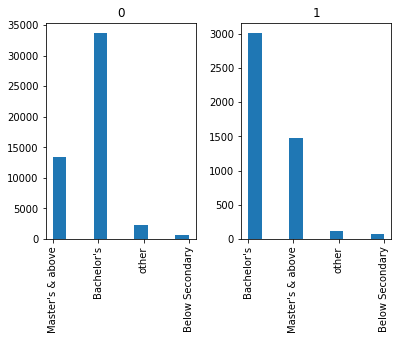

In [30]:
df_temp['education'].hist(by = df_temp['is_promoted'])

In [31]:
#a function to check mode

def Mode(x):
  return x.value_counts().index[0]

In [32]:
df_temp.groupby(['department' ])['education'].agg({Mode})

,Mode
department,
Analytics,Bachelor's
Finance,Bachelor's
HR,Bachelor's
Legal,Bachelor's
Operations,Bachelor's
Procurement,Bachelor's
R&D,Bachelor's
Sales & Marketing,Bachelor's
Technology,Bachelor's


In [33]:
df_temp.groupby(['recruitment_channel' ])['education'].agg({Mode})

,Mode
recruitment_channel,
other,Bachelor's
referred,Bachelor's
sourcing,Bachelor's


In [34]:
df_temp.groupby(['region' ])['education'].agg({Mode})

,Mode
region,
region_1,Bachelor's
region_10,Master's & above
region_11,Bachelor's
region_12,Bachelor's
region_13,Bachelor's
region_14,Bachelor's
region_15,Bachelor's
region_16,Bachelor's
region_17,Bachelor's


In [35]:
df_temp[df_temp.region == 'region_10'].education.value_counts()

Master's & above    393
Bachelor's          251
other                 4
Name: education, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

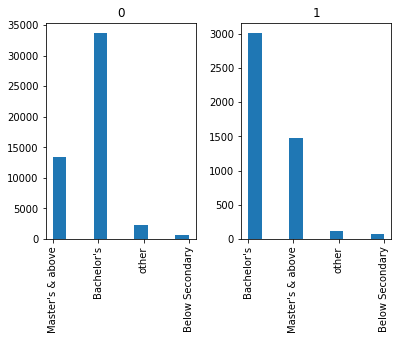

In [36]:
df_temp['education'].hist(by = df_temp['is_promoted'])

From the above it's been observed that is every subgroup the mode for eduction column is almost same if not completely same, hence it won't be a bad thing to replace the null values with mode.

In [37]:
del df_temp

In [38]:
df.fillna({'education': "Bachelor's"}, inplace  = True )

In [39]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Fresher                 0
dtype: int64

In [40]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Fresher'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  Fresher               54808 non-null  int32  
dtypes: float64(1), int3

Now it's time to move on to the next step

## EDA

In [43]:
#Keep Exploring   ~ todo

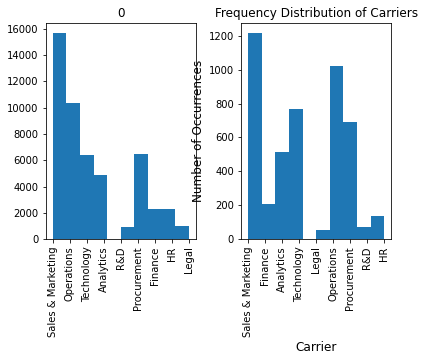

In [44]:
df['department'].hist(by = df['is_promoted'] )
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Carrier', fontsize=12)

plt.show()


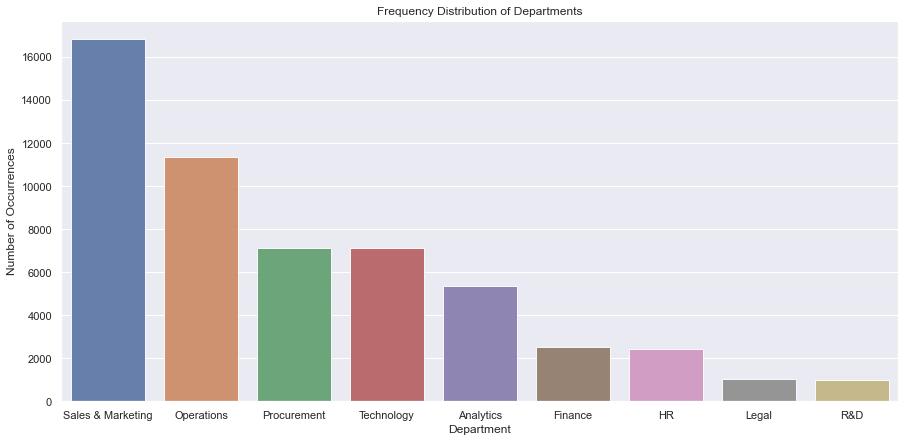

In [46]:
department_count = df['department'].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(15,7))
sns.barplot(department_count.index, department_count.values, alpha=0.9)
plt.title('Frequency Distribution of Departments')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Department', fontsize=12)

plt.show()

Sales team has the maxm staff

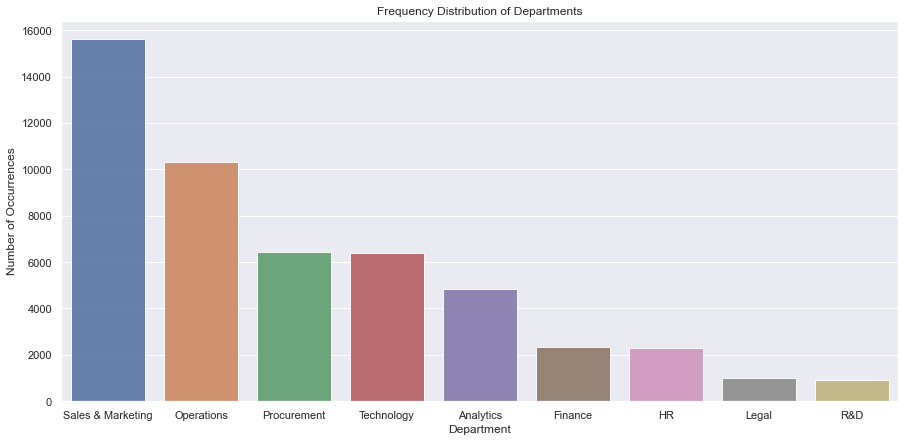

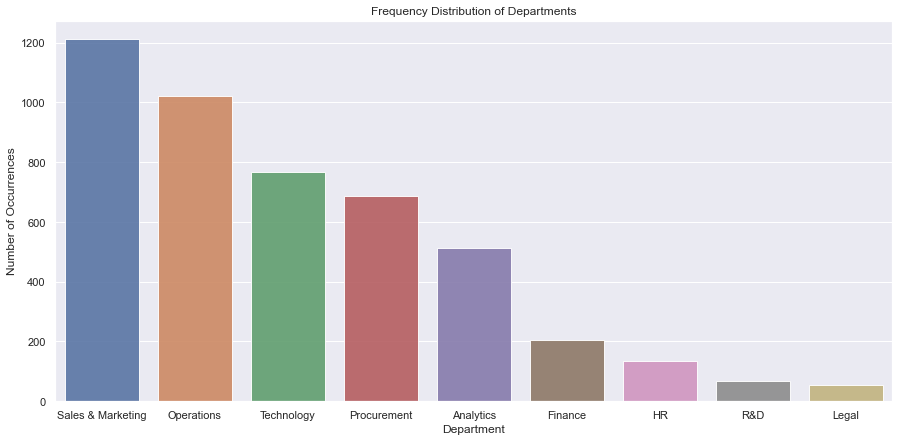

In [47]:
department_count = df['department'].loc[df.is_promoted == 0].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(15,7))
sns.barplot(department_count.index, department_count.values, alpha=0.9)
plt.title('Frequency Distribution of Departments')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Department', fontsize=12)

plt.show()


department_count = df['department'].loc[df.is_promoted == 1].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(15,7))
sns.barplot(department_count.index, department_count.values, alpha=0.9)
plt.title('Frequency Distribution of Departments')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Department', fontsize=12)

plt.show()

It can be seen that operations department has a higher promoting ratio but for most other departments it's almost same just slightly different.

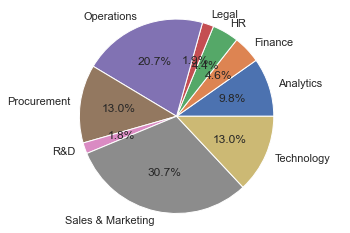

In [48]:
labels = df['department'].astype('category').cat.categories.tolist()
counts = df['department'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) 
ax1.axis('equal')
plt.show()

<AxesSubplot:xlabel='department', ylabel='avg_training_score'>

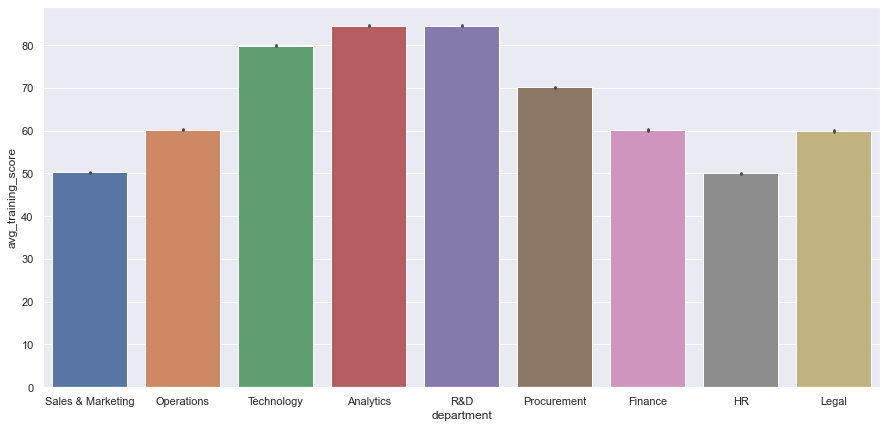

In [49]:
import seaborn as sns
plt.subplots(figsize=(15,7))
sns.barplot(x='department', y='avg_training_score',data=df)

<AxesSubplot:xlabel='department', ylabel='avg_training_score'>

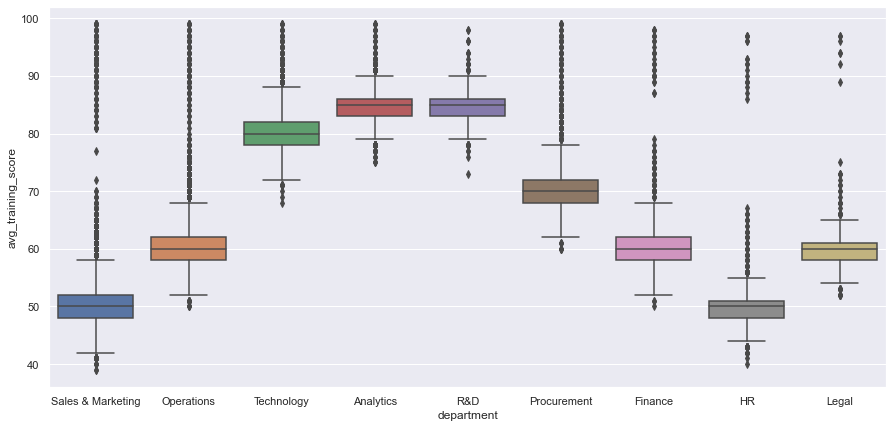

In [50]:
plt.subplots(figsize=(15,7))
sns.boxplot(data = df, x='department', y='avg_training_score')

Now this is something interesting. One can say there are too many outliers in the above department categories when comes to average score. But if we crosscheck this with ratio of people getting promoted depending on these values it would solve almost 1/3rd of our problem

In [52]:
df[(df.department == 'Operations') & (df.avg_training_score > 70) ]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Fresher
230,62923,Operations,region_13,Master's & above,f,other,1,38,5.0,2,1,1,93,1,0
321,27605,Operations,region_22,Master's & above,m,other,1,34,3.0,3,0,0,75,1,0
499,65024,Operations,region_7,Master's & above,f,sourcing,1,33,5.0,6,0,0,74,1,0
566,5272,Operations,region_2,Below Secondary,f,sourcing,1,24,3.0,1,0,0,73,1,1
725,70800,Operations,region_4,Master's & above,f,sourcing,1,37,5.0,8,1,1,99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53833,76941,Operations,region_23,Bachelor's,f,sourcing,1,50,4.0,8,1,0,97,1,0
54146,37302,Operations,region_2,Bachelor's,m,other,1,37,5.0,7,0,1,79,1,0
54416,66467,Operations,region_15,Master's & above,m,other,1,43,4.0,4,0,0,73,1,0
54523,51118,Operations,region_22,Master's & above,m,sourcing,2,38,5.0,11,0,0,72,1,0


In [53]:
#Now the best part is
df[(df.department == 'Operations') & (df.avg_training_score > 70) &(df.is_promoted ==1) ]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Fresher
230,62923,Operations,region_13,Master's & above,f,other,1,38,5.0,2,1,1,93,1,0
321,27605,Operations,region_22,Master's & above,m,other,1,34,3.0,3,0,0,75,1,0
499,65024,Operations,region_7,Master's & above,f,sourcing,1,33,5.0,6,0,0,74,1,0
566,5272,Operations,region_2,Below Secondary,f,sourcing,1,24,3.0,1,0,0,73,1,1
725,70800,Operations,region_4,Master's & above,f,sourcing,1,37,5.0,8,1,1,99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53833,76941,Operations,region_23,Bachelor's,f,sourcing,1,50,4.0,8,1,0,97,1,0
54146,37302,Operations,region_2,Bachelor's,m,other,1,37,5.0,7,0,1,79,1,0
54416,66467,Operations,region_15,Master's & above,m,other,1,43,4.0,4,0,0,73,1,0
54523,51118,Operations,region_22,Master's & above,m,sourcing,2,38,5.0,11,0,0,72,1,0


All the emoloyee scoring exceptionally high have a much higher chance of getting promoted. It isn't only for the the operations data. I have checked it with every department and the results are almost same in every case. Also employees with exceptionally less training score are much less likely to get promotion.

####  Basis for Feature one
The above results can be used to create a rank or grade feature for employees

<AxesSubplot:xlabel='region', ylabel='count'>

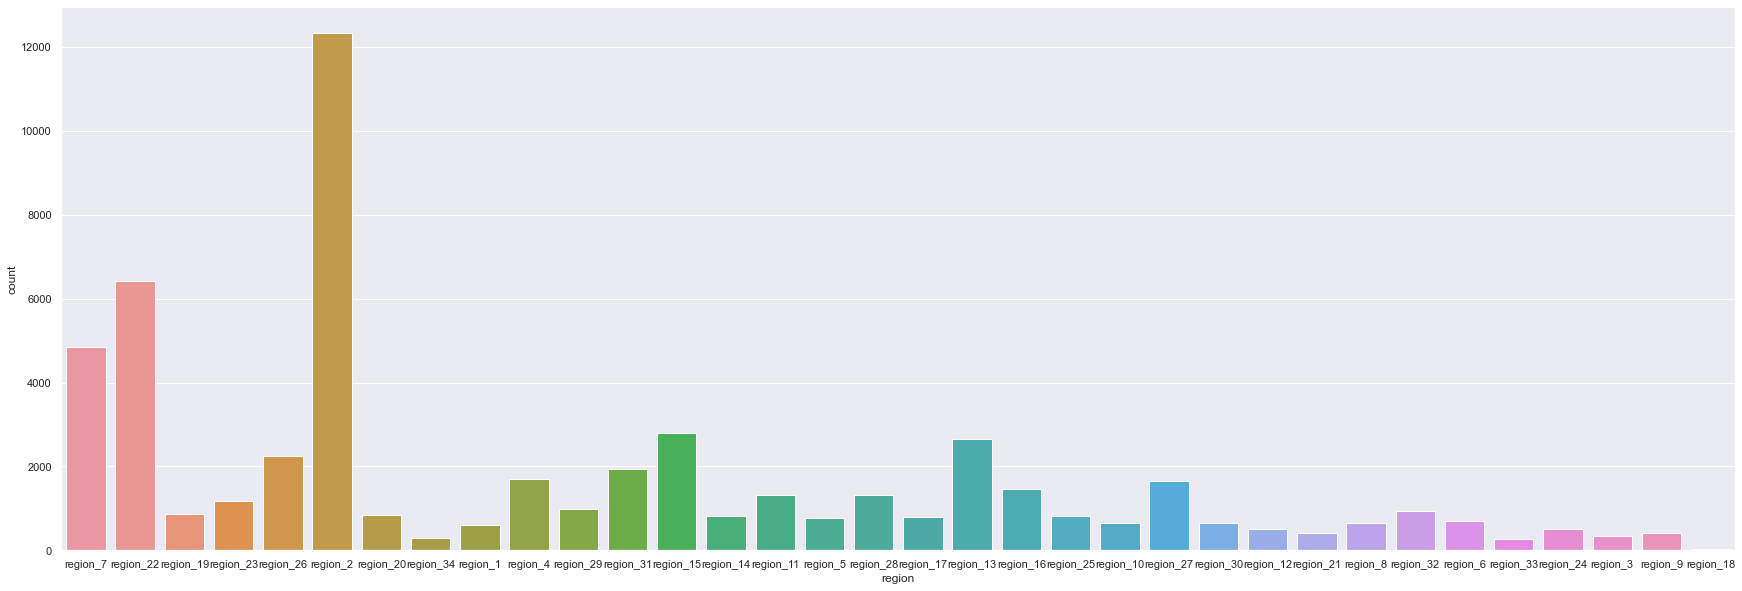

In [54]:
#Now coming to region
plt.subplots(figsize=(30,10))
sns.countplot(x = 'region', data = df)

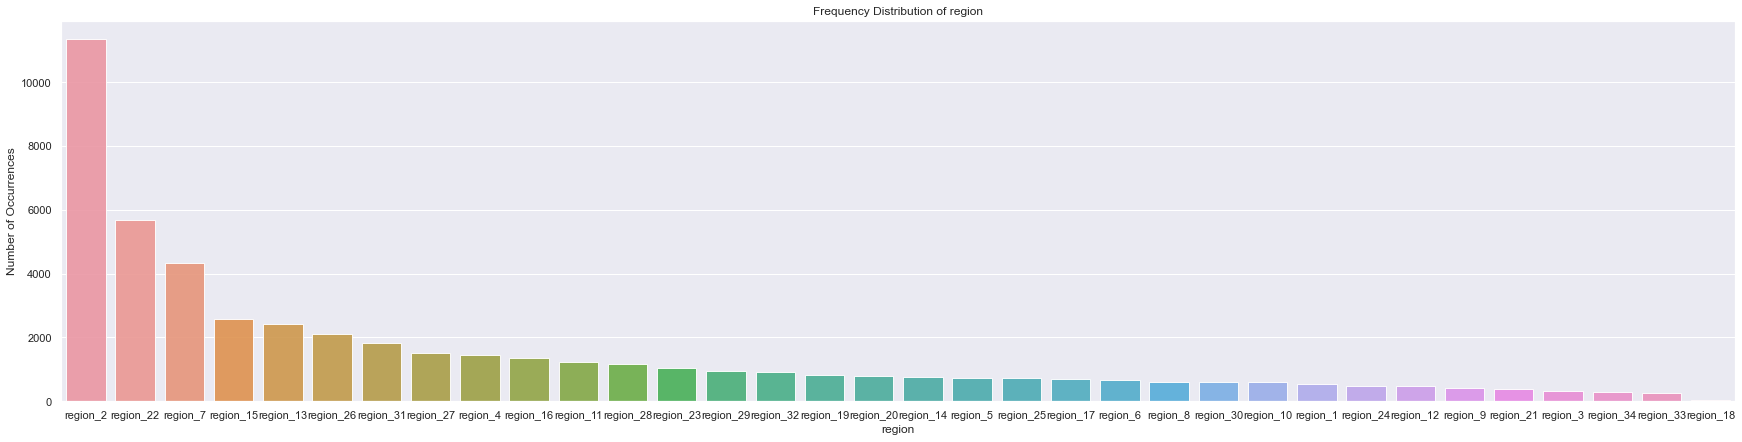

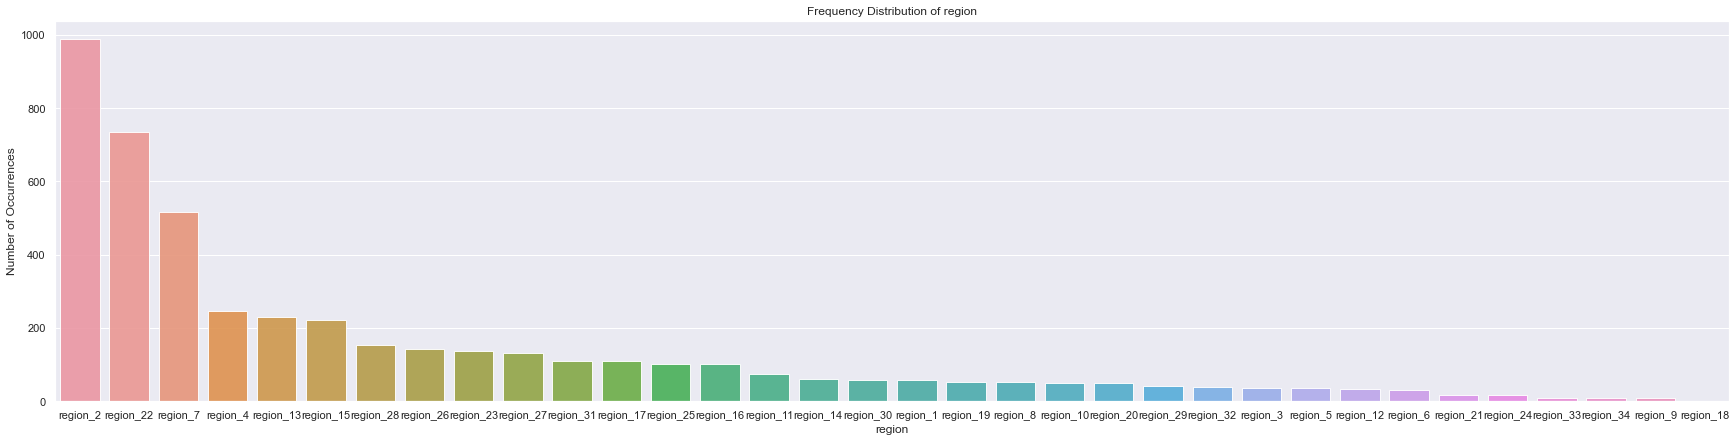

In [55]:
region_count = df['region'].loc[df.is_promoted == 0].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(region_count.index, region_count.values, alpha=0.9)
plt.title('Frequency Distribution of region')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('region', fontsize=12)

plt.show()


region_count = df['region'].loc[df.is_promoted == 1].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(region_count.index, region_count.values, alpha=0.9)
plt.title('Frequency Distribution of region')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('region', fontsize=12)

plt.show()



Looking at above graph it can be seen that each region has almost eqal promoting ratio

In [56]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Fresher'],
      dtype='object')

<AxesSubplot:xlabel='education', ylabel='count'>

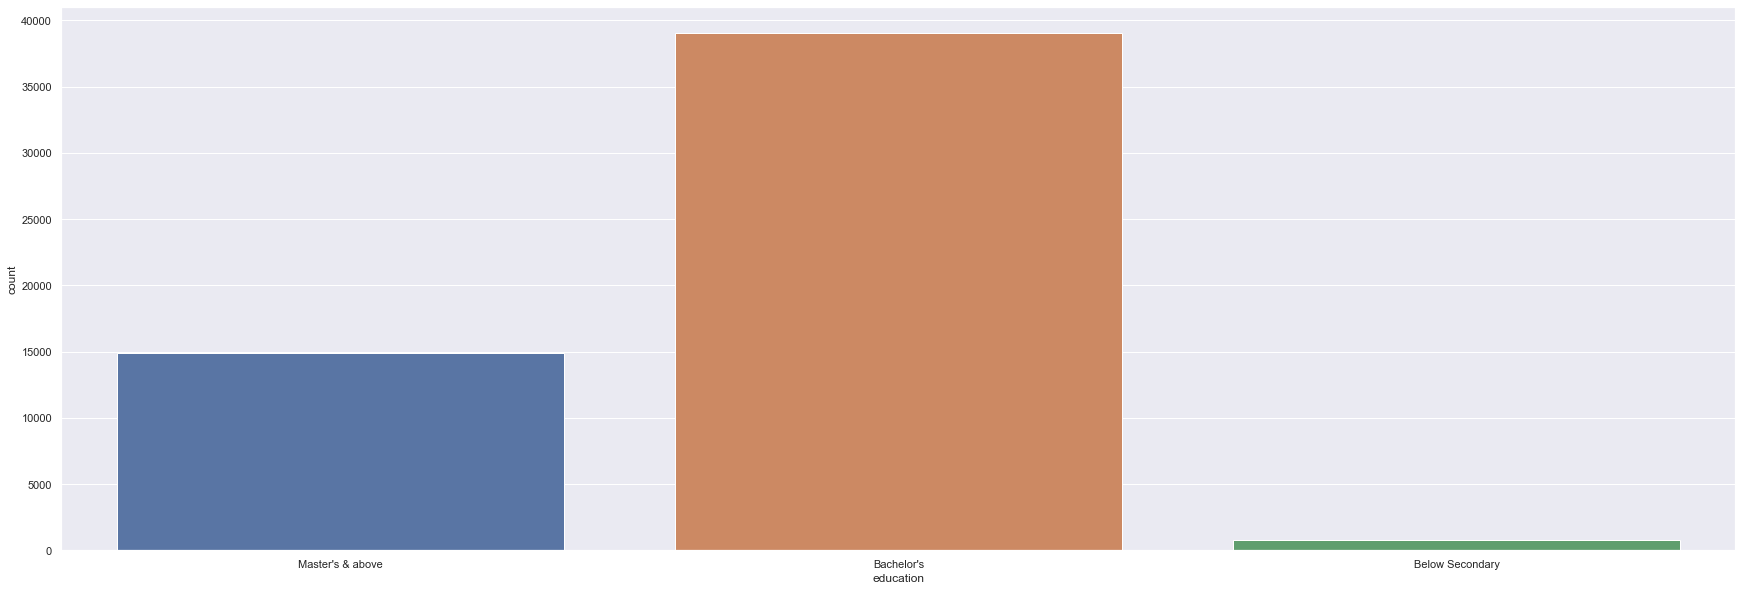

In [57]:
plt.subplots(figsize=(30,10))
sns.countplot(x = 'education', data = df)

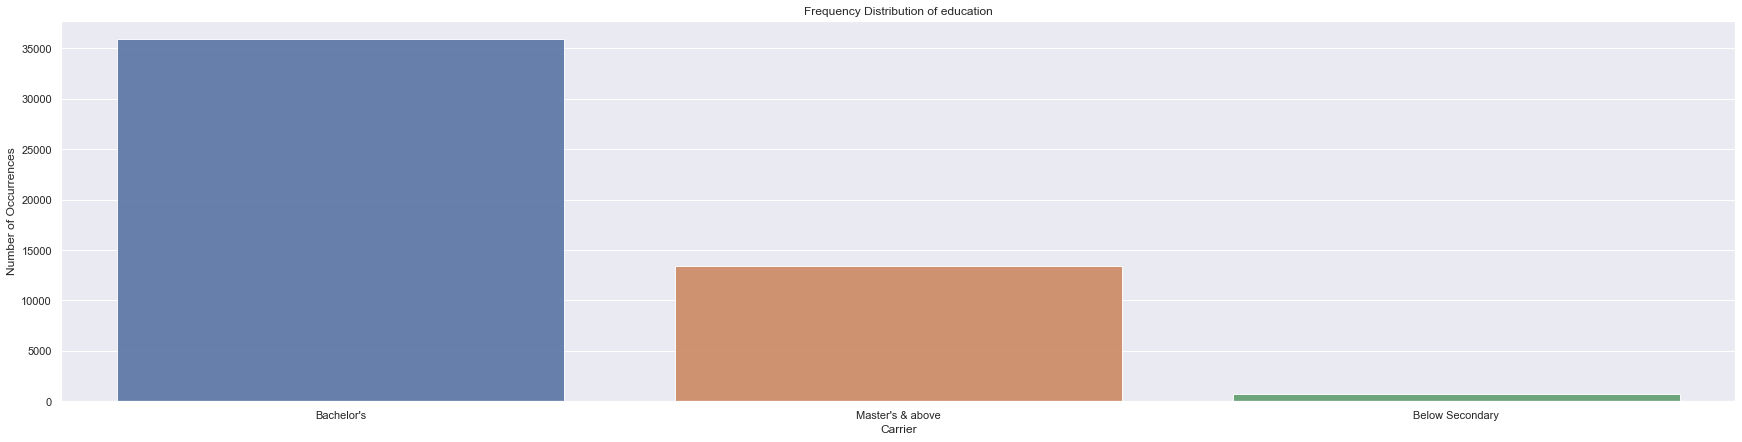

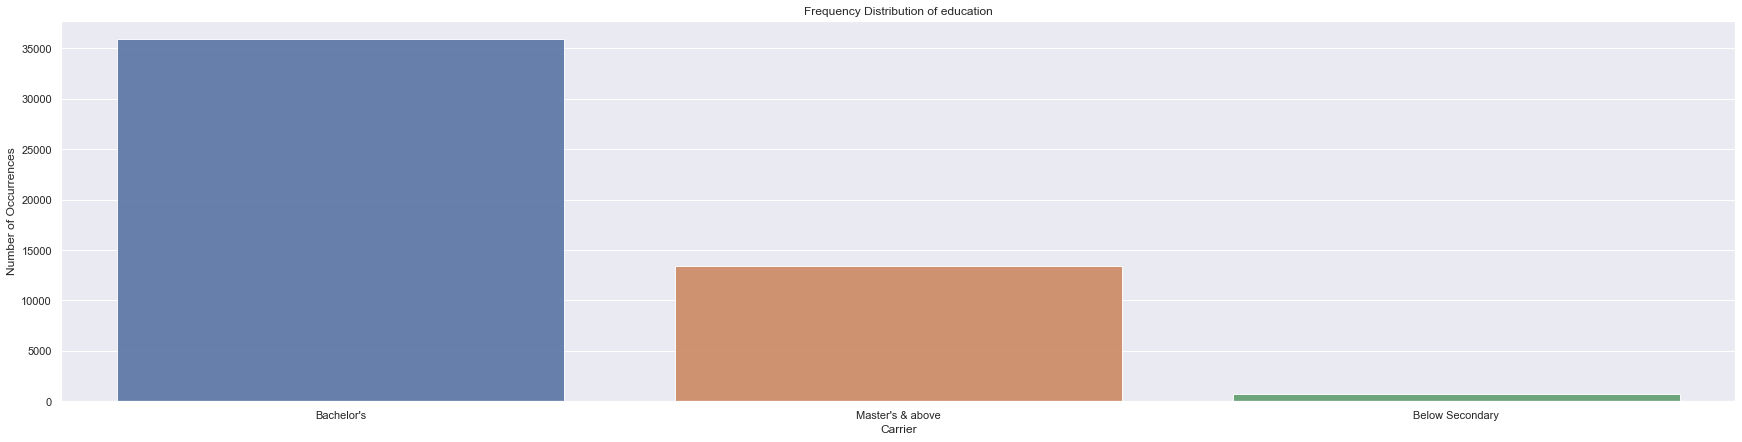

In [59]:
education_count = df['education'].loc[df.is_promoted == 0].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(education_count.index, education_count.values, alpha=0.9)
plt.title('Frequency Distribution of education')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Carrier', fontsize=12)

plt.show()


educatioin_count = df['education'].loc[df.is_promoted == 1].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(education_count.index, education_count.values, alpha=0.9)
plt.title('Frequency Distribution of education')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Carrier', fontsize=12)

plt.show()


In [60]:
#To observer education more thoroughly let's do this
#Just to check the ratios for people getting promotion based on their education 
edu = {"Bachelor's" :2, 
"Master's & above":3,
"Below Secondary":1  }

df['education_rank'] = df.education.map(edu)


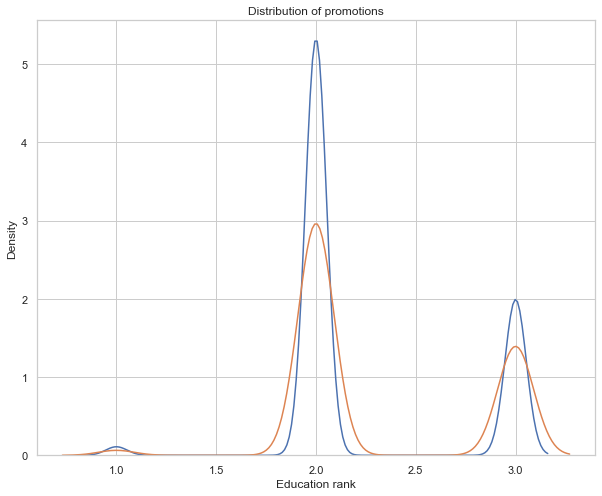

In [61]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df.is_promoted == 0, 'education_rank'] , label = 'promoted == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df.is_promoted == 1, 'education_rank'], label = 'promoted == 1')

# Labeling of plot
plt.xlabel('Education rank'); plt.ylabel('Density'); plt.title('Distribution of promotions');

From above it can be seen that employees with master's have a slight more chance of getting promoted.

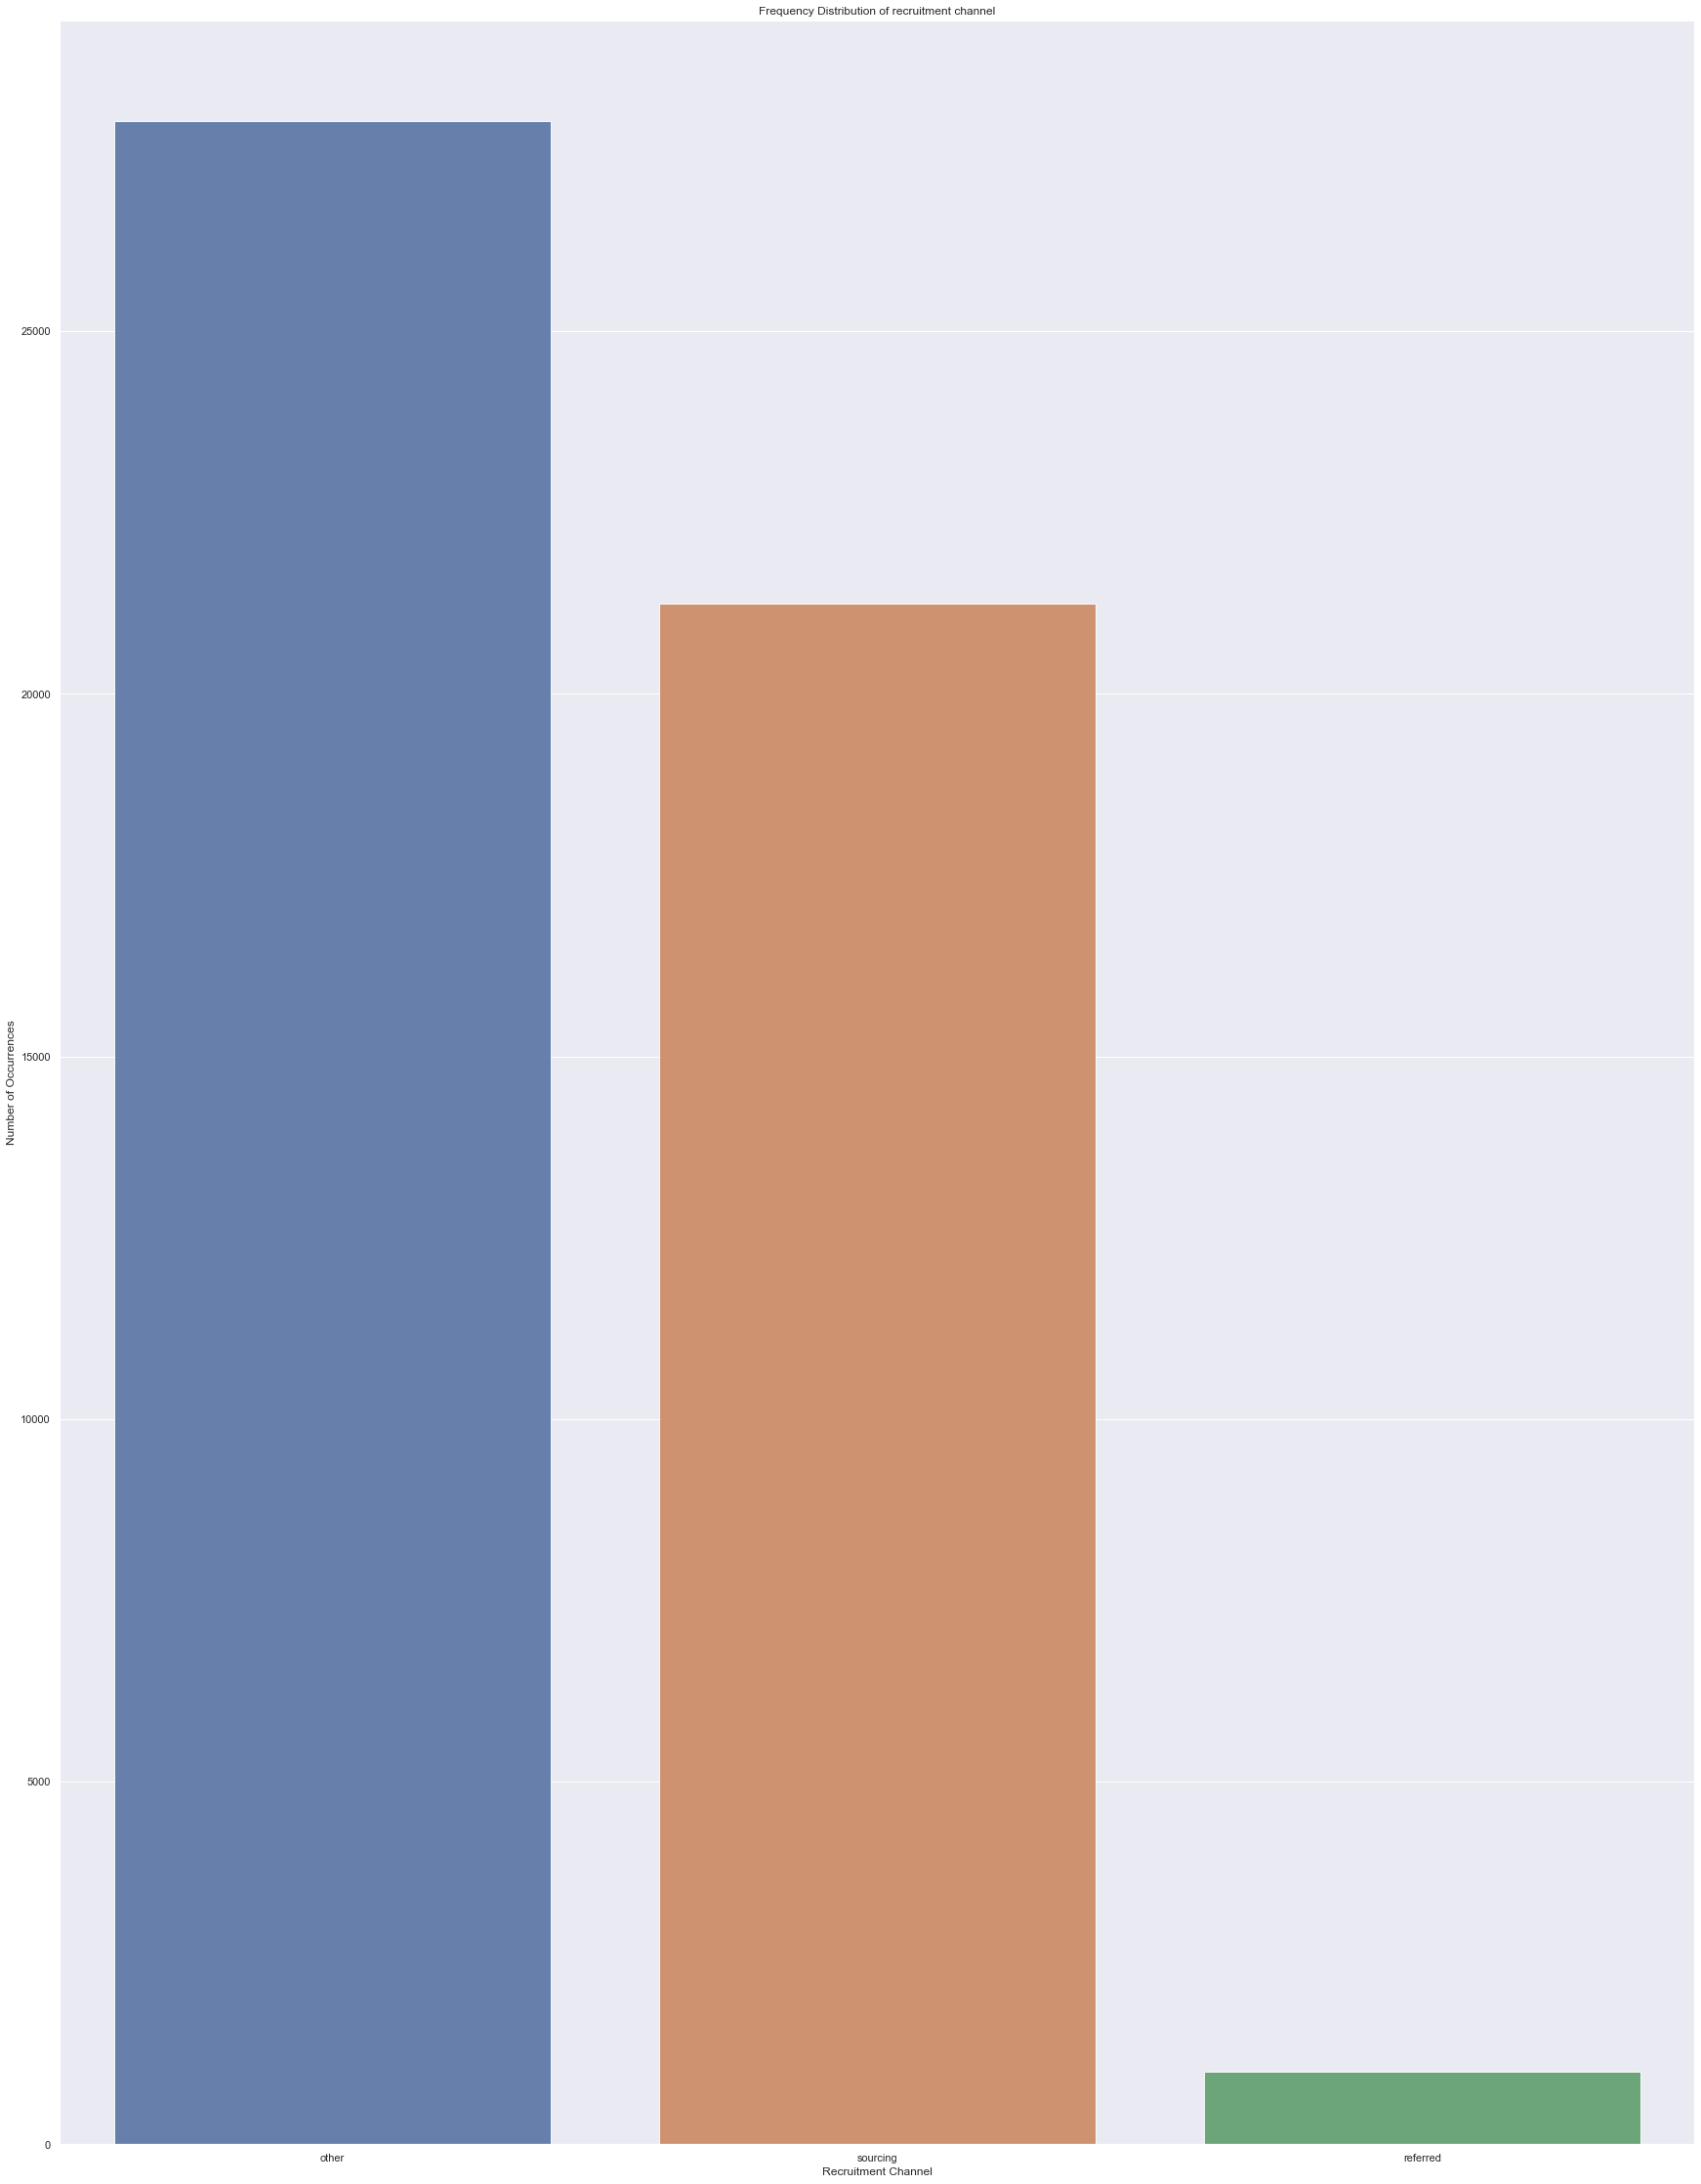

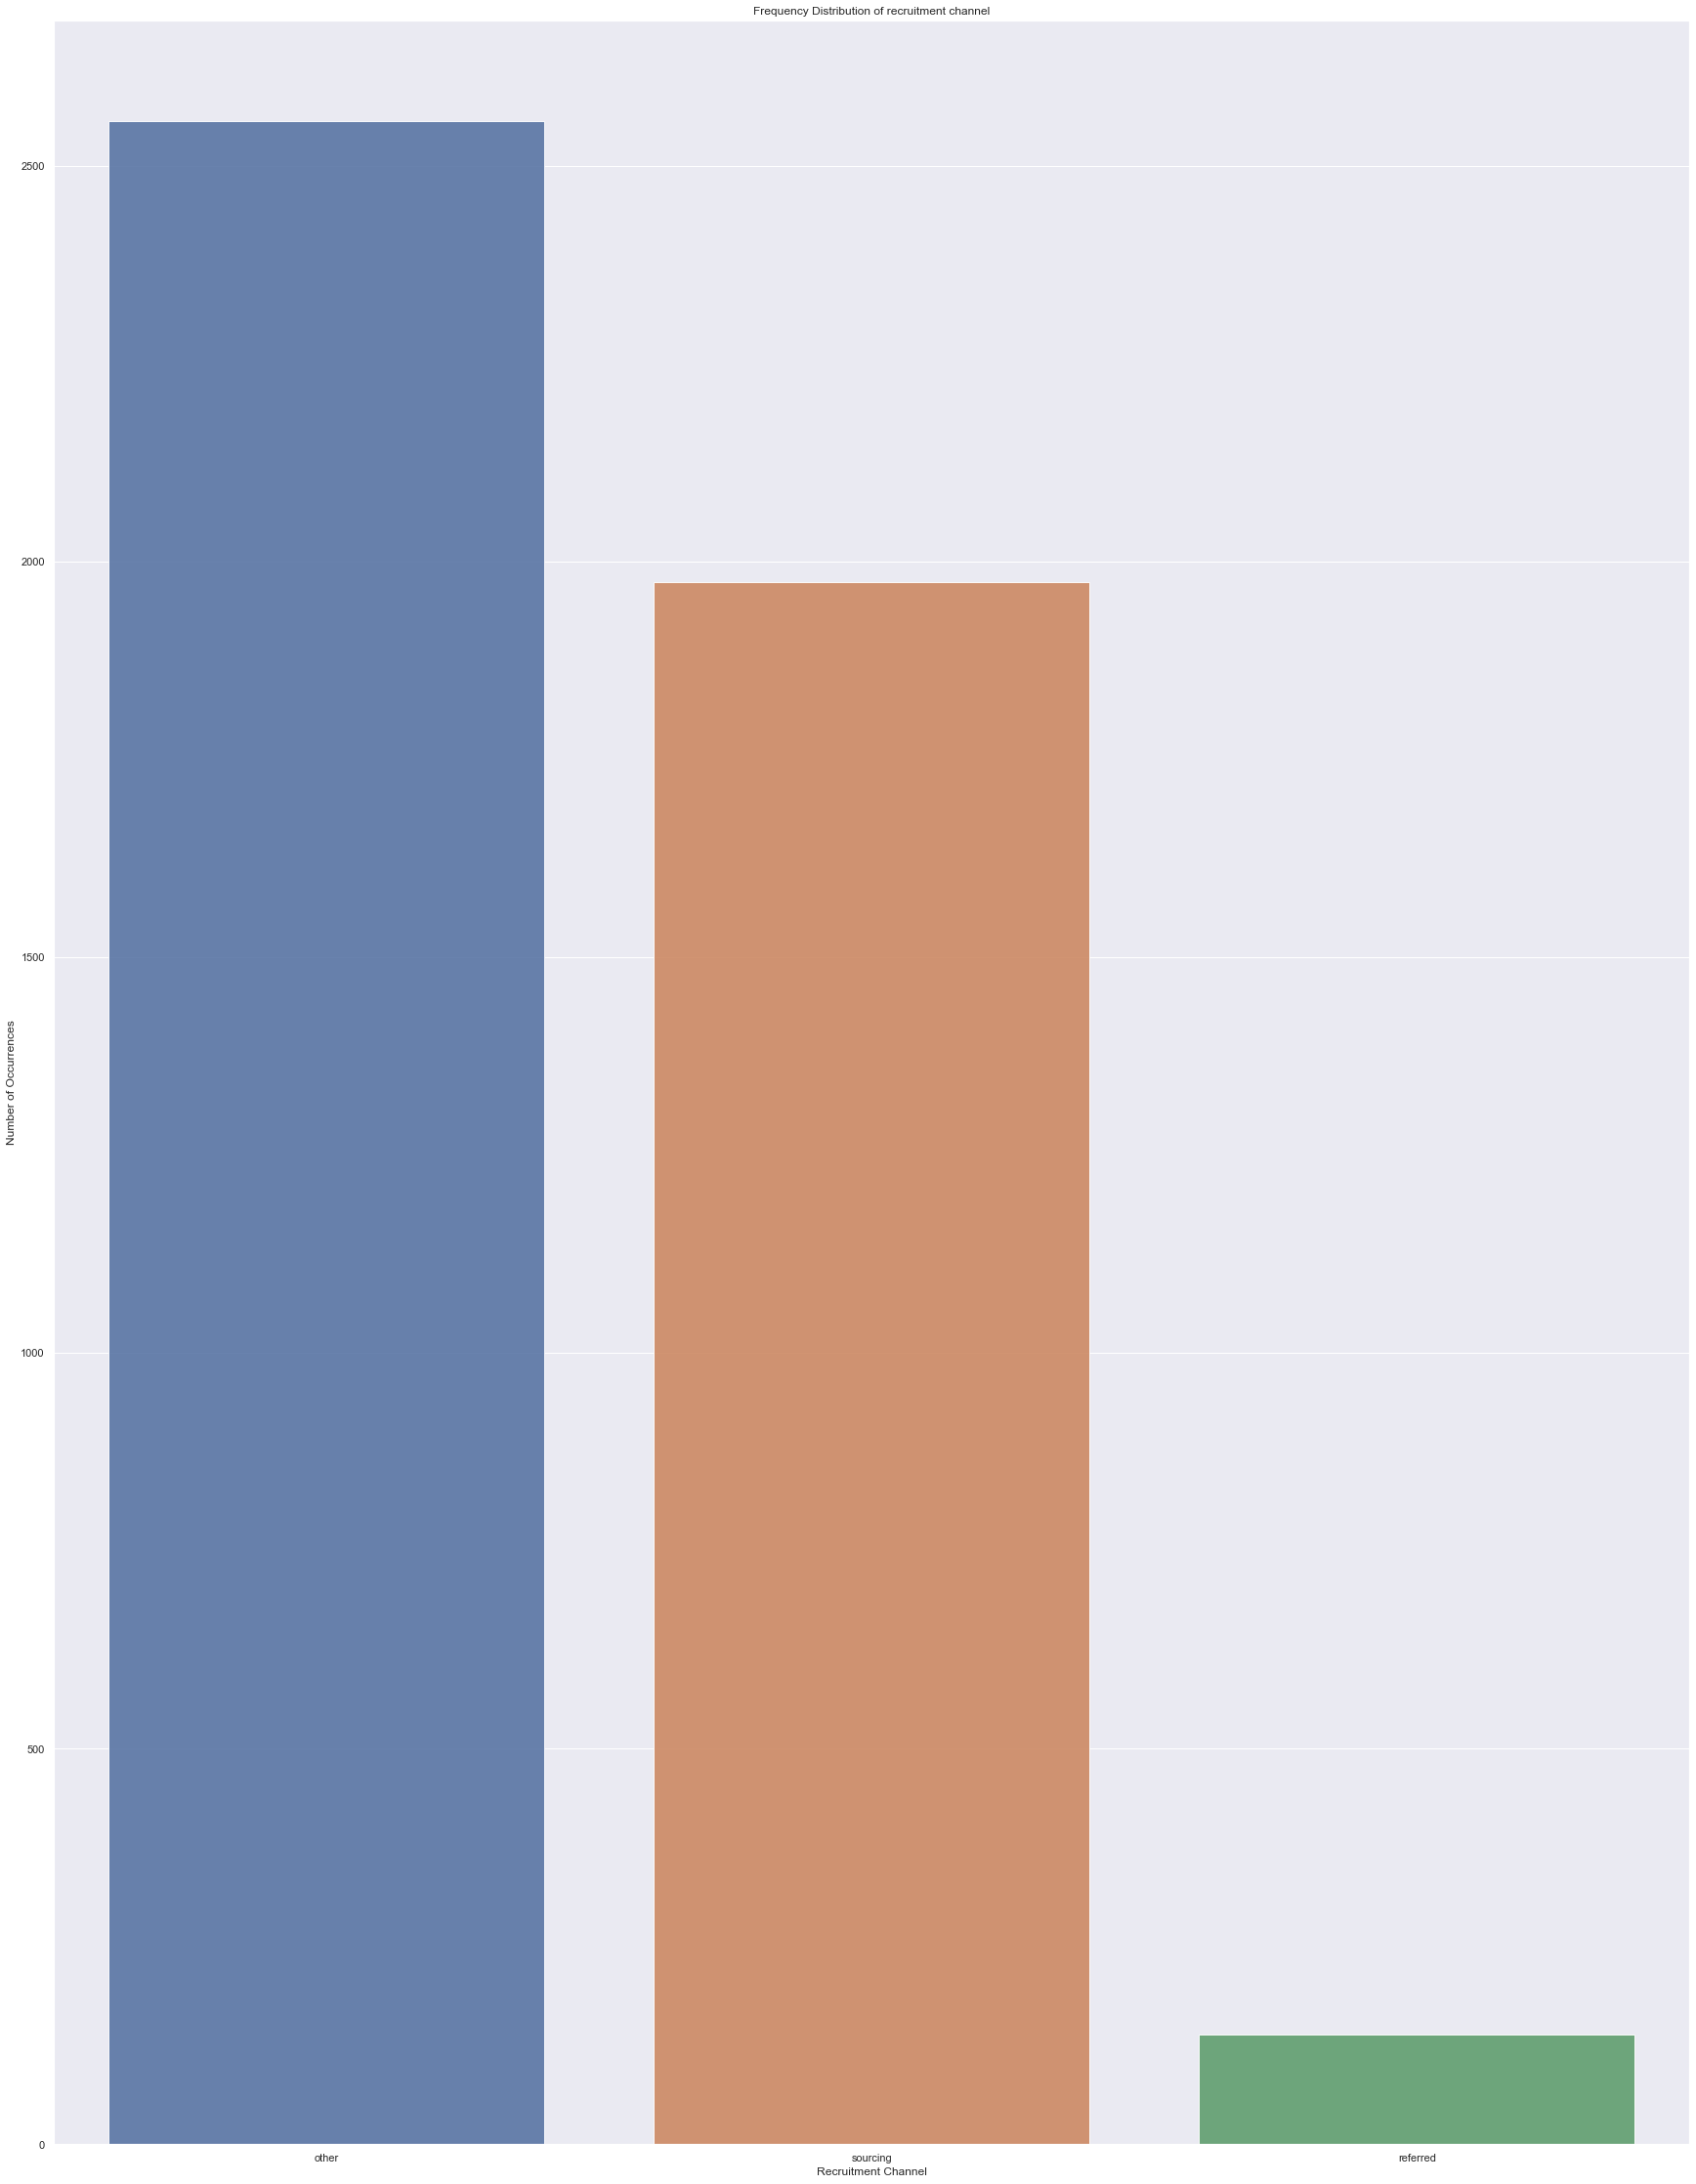

In [65]:
recruitment_count = df['recruitment_channel'].loc[df.is_promoted == 0].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,40))
sns.barplot(recruitment_count.index, recruitment_count.values, alpha=0.9)
plt.title('Frequency Distribution of recruitment channel')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Recruitment Channel', fontsize=12)

plt.show()


recruitment_count = df['recruitment_channel'].loc[df.is_promoted == 1].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,40))
sns.barplot(recruitment_count.index, recruitment_count.values, alpha=0.9)
plt.title('Frequency Distribution of recruitment channel')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Recruitment Channel', fontsize=12)

plt.show()

Employee hired by sourcing have a higher ratio of getting promotion

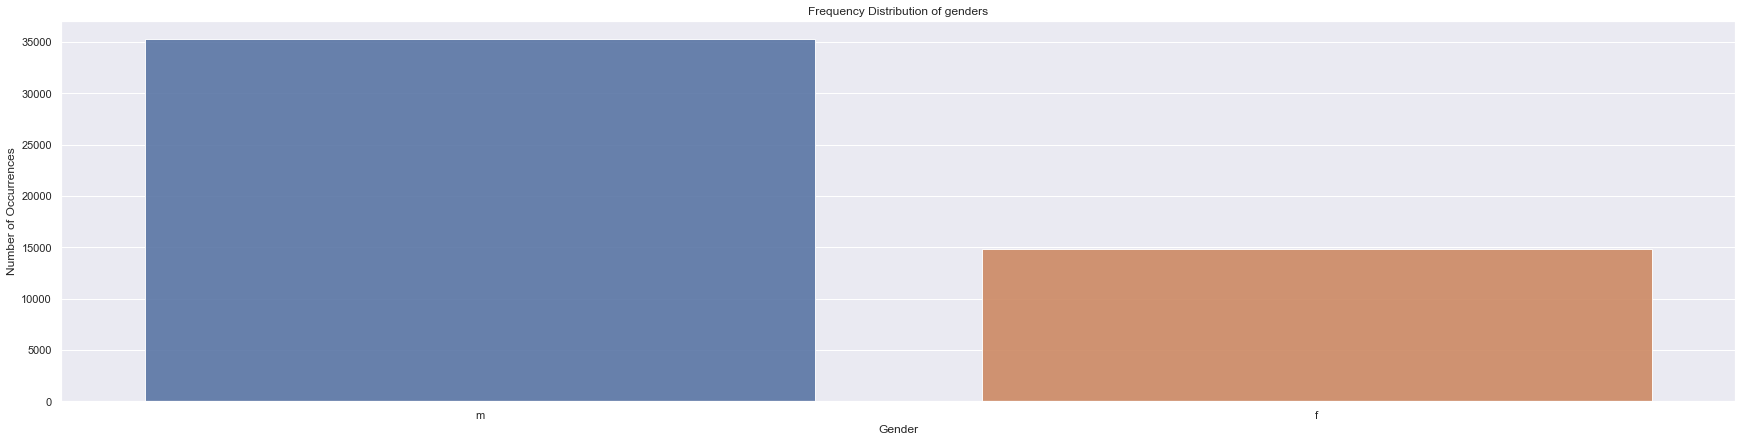

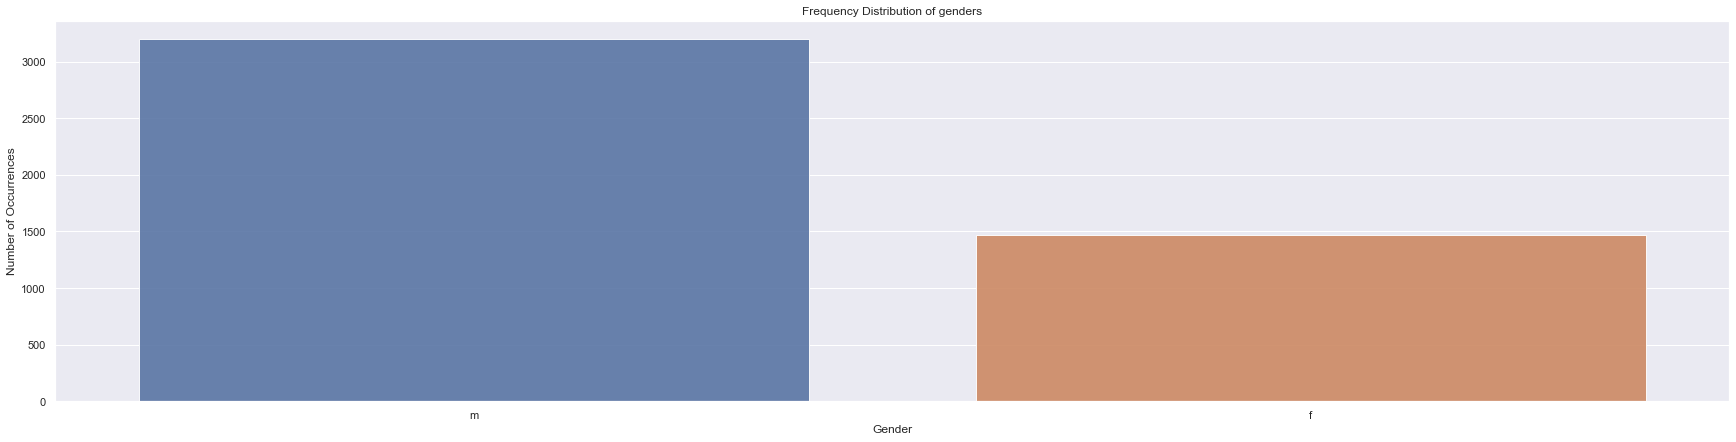

In [67]:
gender_count = df['gender'].loc[df.is_promoted == 0].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of genders')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Gender', fontsize=12)

plt.show()


gender_count = df['gender'].loc[df.is_promoted == 1].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of genders')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('Gender', fontsize=12)

plt.show()



Gender is not related to promotion in anyway

<AxesSubplot:xlabel='no_of_trainings', ylabel='Density'>

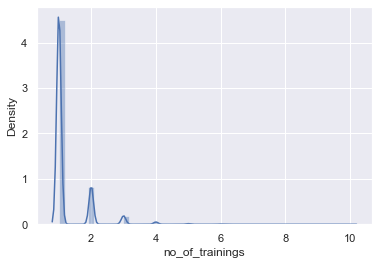

In [68]:
sns.distplot(df.no_of_trainings)

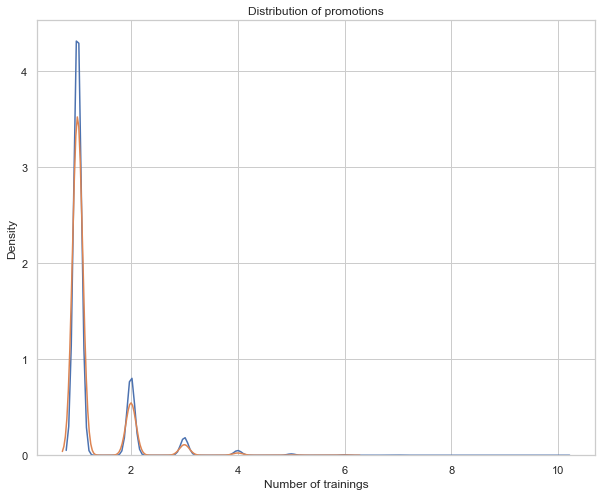

In [71]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df.is_promoted == 0, 'no_of_trainings'], label = 'promoted == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df.is_promoted == 1, 'no_of_trainings'], label = 'promoted == 1')

# Labeling of plot
plt.xlabel('Number of trainings'); plt.ylabel('Density'); plt.title('Distribution of promotions');

The lines seems to converging more and more as they more far in the x axis

<AxesSubplot:xlabel='age', ylabel='Density'>

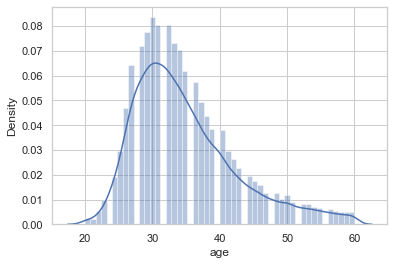

In [73]:
sns.distplot(df.age)

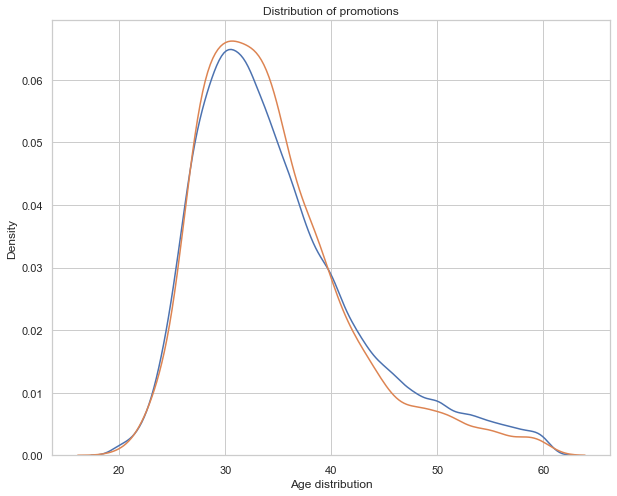

In [74]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df.is_promoted == 0, 'age'], label = 'promoted == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df.is_promoted == 1, 'age'], label = 'promoted == 1')

# Labeling of plot
plt.xlabel('Age distribution'); plt.ylabel('Density'); plt.title('Distribution of promotions');

after 40s the ratio of employee getting promotions lessens

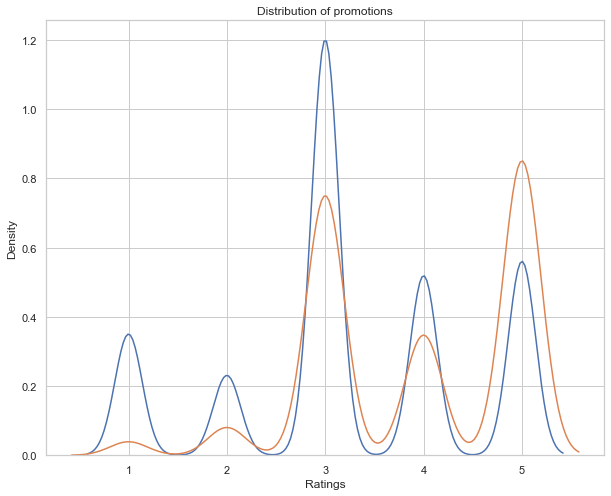

In [76]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df.is_promoted == 0, 'previous_year_rating'], label = 'promoted == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df.is_promoted == 1, 'previous_year_rating'], label = 'promoted == 1')

# Labeling of plot
plt.xlabel('Ratings'); plt.ylabel('Density'); plt.title('Distribution of promotions');

Obviously the employees having 5 star rating stand a higher chance of getting promoted

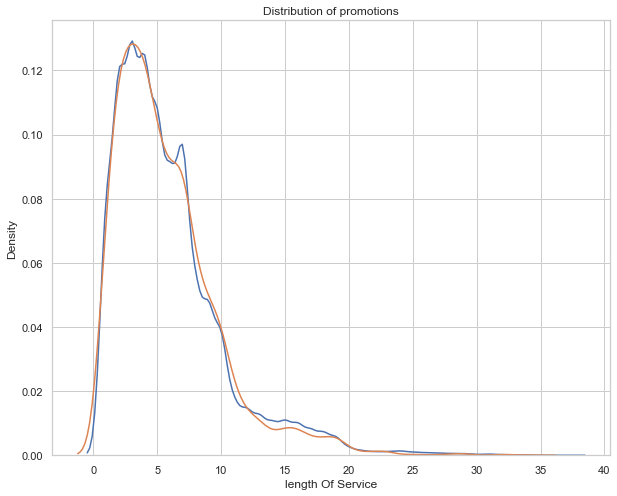

In [77]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')

# KDE plot of loans that were repaid on time
sns.kdeplot(df.loc[df.is_promoted == 0, 'length_of_service'], label = 'promoted == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df.loc[df.is_promoted == 1, 'length_of_service'], label = 'promoted == 1')

# Labeling of plot
plt.xlabel('length Of Service'); plt.ylabel('Density'); plt.title('Distribution of promotions');

From the graph I can't see much relation or variation with length of service

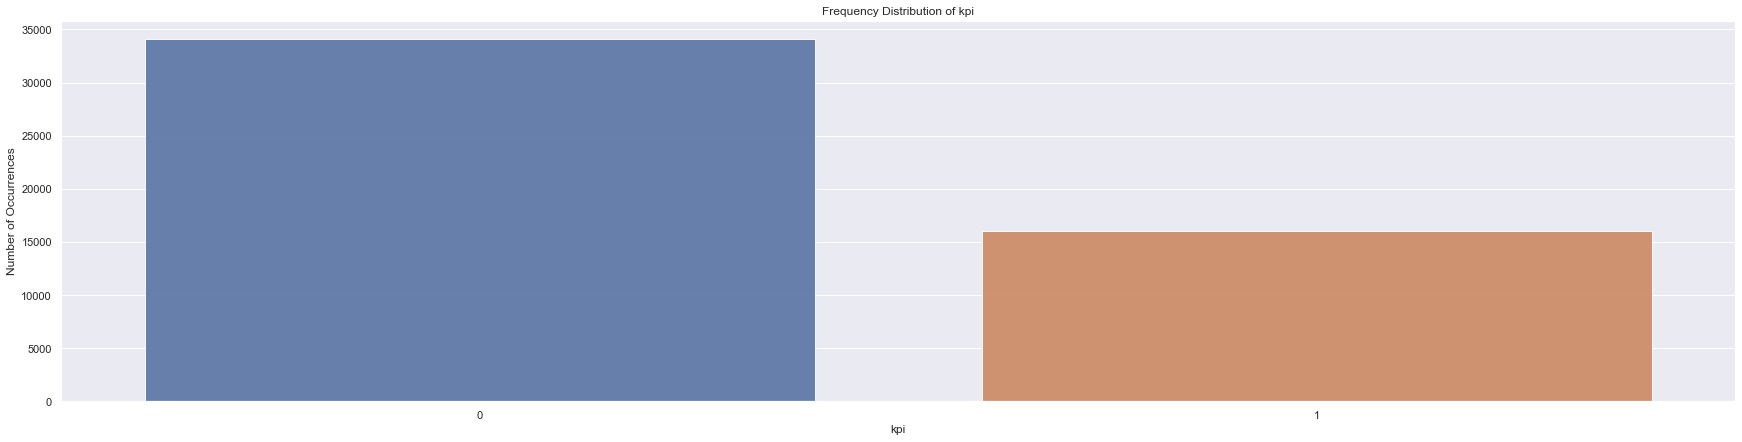

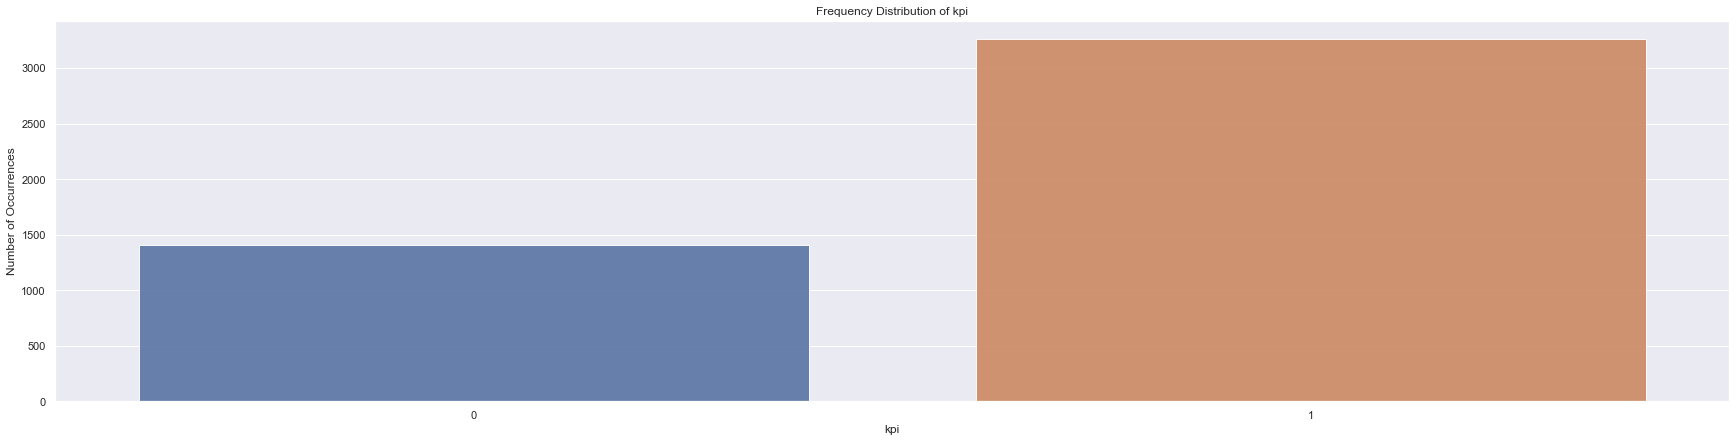

In [78]:
kpi_count = df['KPIs_met >80%'].loc[df.is_promoted == 0].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(kpi_count.index, kpi_count.values, alpha=0.9)
plt.title('Frequency Distribution of kpi')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('kpi', fontsize=12)

plt.show()


kpi_count = df['KPIs_met >80%'].loc[df.is_promoted == 1].value_counts()
sns.set(style="darkgrid")
plt.subplots(figsize=(30,7))
sns.barplot(kpi_count.index, kpi_count.values, alpha=0.9)
plt.title('Frequency Distribution of kpi')
plt.ylabel('Number of Occurrences', fontsize=12)

plt.xlabel('kpi', fontsize=12)

plt.show()

Employees with KPI above 80% are more likely to get promoted

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

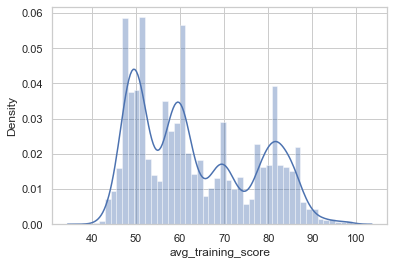

In [75]:
sns.distplot(df.avg_training_score)

In [66]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Fresher', 'education_rank'],
      dtype='object')

## Feature Engineering

In [79]:
def floor(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    
    return lower
    


def roof(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    
    #print(x)
    
    
    return upper





In [80]:
df.groupby('department')['avg_training_score'].agg({floor, roof})

,roof,floor
department,,
Analytics,90.5,78.5
Finance,68.0,52.0
HR,55.5,43.5
Legal,65.5,53.5
Operations,68.0,52.0
Procurement,78.0,62.0
R&D,90.5,78.5
Sales & Marketing,58.0,42.0
Technology,88.0,72.0


In [81]:
df['upper_limit'] = df.groupby('department')['avg_training_score'].transform(roof)
df['lower_limit'] = df.groupby('department')['avg_training_score'].transform(floor)


#### Feature F1 keeps track of exceptionally high or low  or average training scores

In [82]:
df.loc[df['avg_training_score'] >=df.upper_limit , 'F1'] = 2.0
df.loc[(df['avg_training_score'] > df.lower_limit) & (df['avg_training_score'] <=df.upper_limit) , 'F1'] = 1.0
df.loc[df['avg_training_score'] <= (df.lower_limit) , 'F1'] = 0.0

#### Binning

The age column can be divided into bins to see better results.

In [128]:
df['age_bucket'] = pd.cut(df['age'], [19, 29, 39,49, 60 ], labels=['20', '30', '40', '50'])

In [129]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'Fresher', 'education_rank',
       'upper_limit', 'lower_limit', 'F1', 'age_bucket'],
      dtype='object')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

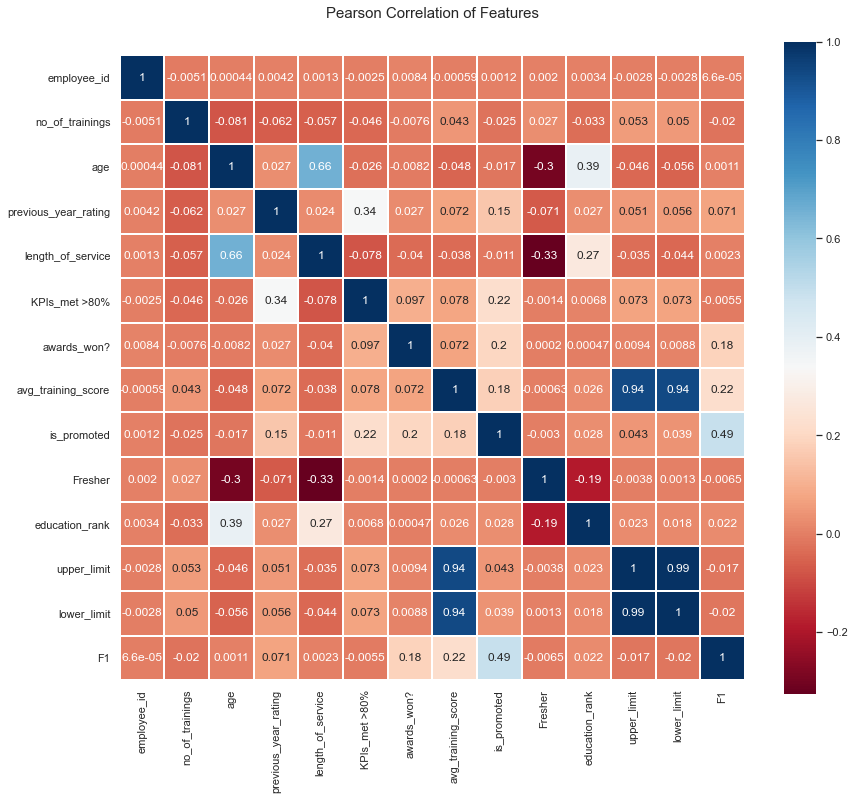

In [130]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [131]:
df_lets_do_the_test = df.drop(['employee_id','region','gender','length_of_service', 'upper_limit', 'lower_limit', 'avg_training_score'], axis = 1)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

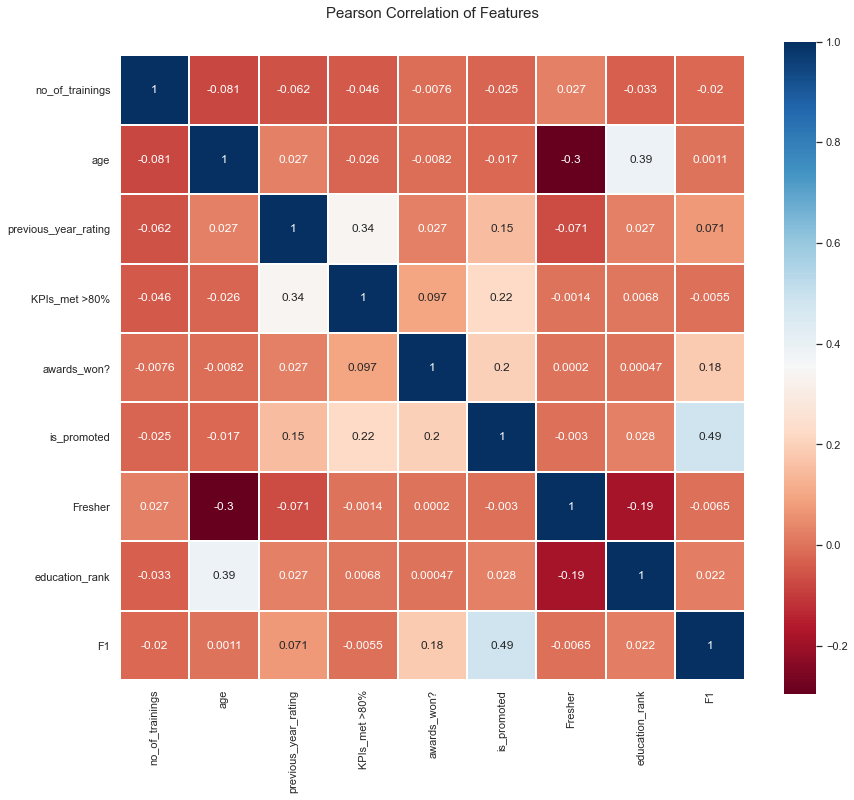

In [132]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_lets_do_the_test.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [133]:
df_lets_do_the_test .columns

Index(['department', 'education', 'recruitment_channel', 'no_of_trainings',
       'age', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'is_promoted', 'Fresher', 'education_rank', 'F1', 'age_bucket'],
      dtype='object')

In [134]:
df_lets_do_the_test = pd.get_dummies(df_lets_do_the_test)

In [135]:
df_lets_do_the_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'is_promoted', 'Fresher', 'education_rank', 'F1',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'age_bucket_20', 'age_bucket_30',
       'age_bucket_40', 'age_bucket_50'],
      dtype='object')

In [143]:
df_lets_do_the_test.drop(['age', 'education_Below Secondary','age_bucket_50', 'recruitment_channel_other'],axis = 1, inplace =True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

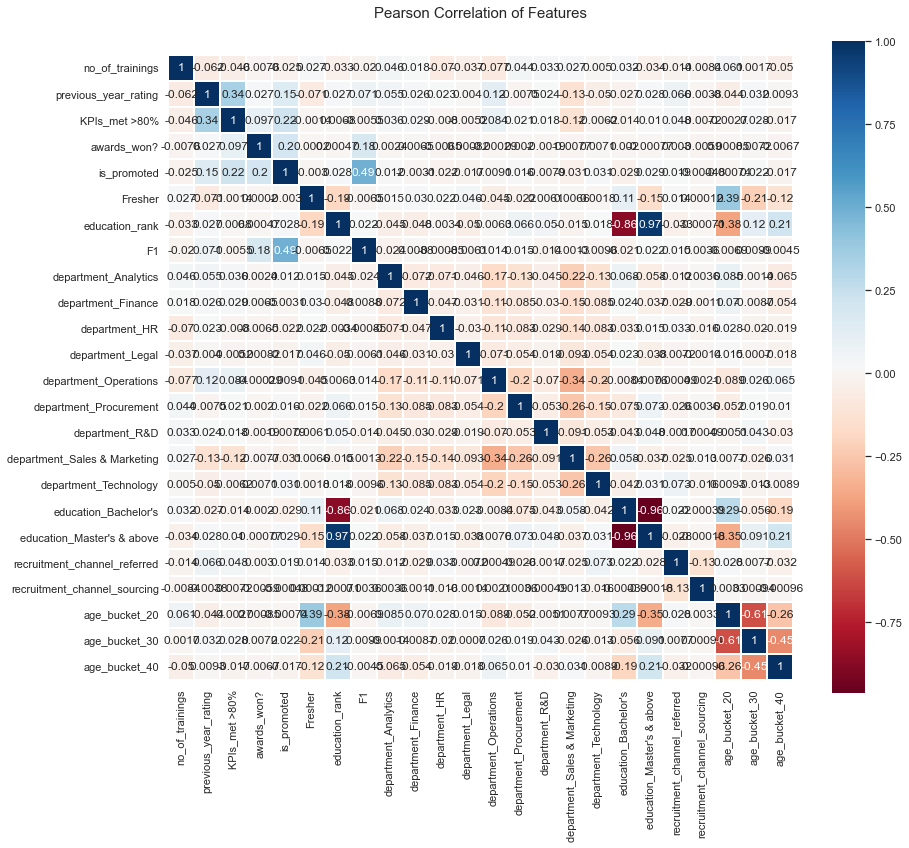

In [144]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_lets_do_the_test.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [145]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e price
X = df_lets_do_the_test.drop('is_promoted',axis=1)

# y --> contains only the target value 
Y = df_lets_do_the_test['is_promoted']

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,Y,test_size=0.3,random_state=24 , shuffle = False)

In [147]:
X_inter_test.shape, y_inter_test.shape

((16443, 23), (16443,))

In [148]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [149]:
print(X_test.shape, y_test.shape)
X_val.shape, y_val.shape

(8222, 23) (8222,)


((8221, 23), (8221,))

In [150]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [151]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [152]:
xgb_model =  XGBClassifier(learning_rate =0.1,n_estimators=250,max_depth=5,subsample = 0.70,verbosity = 0,
                           scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2)

In [153]:
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_train, ntree_limit =25)
f1_score(y_train, y_predict.round(0))

0.49966086366719425

In [154]:
y_predict = xgb_model.predict(X_val)
f1_score(y_val, y_predict.round(0))

0.522052205220522

In [155]:
y_predict = xgb_model.predict(X_test)
f1_score(y_test, y_predict.round(0))


0.49809885931558945

In [156]:
lgbm_model = LGBMClassifier(subsample_freq = 2,objective ="binary",importance_type = "gain",verbosity = -1,max_bin = 60,num_leaves = 200,
                                             boosting_type = 'dart',learning_rate=0.15,n_estimators=200,max_depth=5,scale_pos_weight=2.5)

In [157]:
lgbm_model.fit(X_train, y_train)
y_predict = lgbm_model.predict(X_train, ntree_limit =25)
f1_score(y_train, y_predict.round(0))

0.5101054481546573

In [158]:
y_predict = lgbm_model.predict(X_val)
f1_score(y_val, y_predict.round(0))

0.5349716446124764

In [159]:
y_predict = lgbm_model.predict(X_test)
f1_score(y_test, y_predict.round(0))


0.48938321536905965

Both models are performing quite similar but LGBM is performing slightly better
on test and val set hence I am going forward with LGBM

In [177]:
df_real = pd.read_csv('test.csv')

In [178]:
df_real.loc[df.previous_year_rating.isna() , 'Fresher'] = 1

In [179]:
df_real = df_real.fillna({'previous_year_rating': 3.0, 'education': "Bachelor's", 'Fresher': 0})


In [180]:
df_real['age_bucket'] = pd.cut(df_real['age'], [19, 29, 39,49, 60 ], labels=['20', '30', '40', '50'])

In [181]:
df_real.groupby('department')['avg_training_score'].agg({floor, roof})

,roof,floor
department,,
Analytics,90.5,78.5
Finance,68.0,52.0
HR,58.0,42.0
Legal,69.5,49.5
Operations,68.0,52.0
Procurement,78.0,62.0
R&D,92.0,76.0
Sales & Marketing,55.5,43.5
Technology,88.0,72.0


In [182]:
df_real['upper_limit'] = df_real.groupby('department')['avg_training_score'].transform(roof)
df_real['lower_limit'] = df_real.groupby('department')['avg_training_score'].transform(floor)


In [183]:
df_real.loc[df_real['avg_training_score'] >=df_real.upper_limit , 'F1'] = 2.0
df_real.loc[(df_real['avg_training_score'] > df_real.lower_limit) & (df_real['avg_training_score'] <=df_real.upper_limit) , 'F1'] = 1.0
df_real.loc[df_real['avg_training_score'] <= (df_real.lower_limit) , 'F1'] = 0.0

In [184]:
edu = {"Bachelor's" :2, 
"Master's & above":3,
"Below Secondary":1, 
}

df_real['education_rank'] = df_real.education.map(edu)

In [185]:
df_real

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Fresher,age_bucket,upper_limit,lower_limit,F1,education_rank
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,0.0,20,88.0,72.0,1.0,2.0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0.0,30,58.0,42.0,1.0,2.0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0.0,30,55.5,43.5,1.0,2.0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0.0,30,78.0,62.0,1.0,2.0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0.0,30,68.0,52.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0.0,20,69.5,49.5,1.0,1.0
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0.0,30,88.0,72.0,1.0,2.0
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0.0,20,58.0,42.0,1.0,2.0
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,0.0,20,78.0,62.0,1.0,2.0


In [186]:
df_real = df_real.drop(['employee_id','region' ,'gender' ,'length_of_service', 'upper_limit', 'lower_limit', 'avg_training_score'], axis = 1)

In [187]:
df_real = pd.get_dummies(df_real)

In [192]:
df_real.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?', 'Fresher', 'F1', 'education_rank',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'education_others', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'age_bucket_20', 'age_bucket_30', 'age_bucket_40', 'age_bucket_50'],
      dtype='object')

In [195]:
df_real.drop(['age',  'education_Below Secondary', 'age_bucket_50', 'recruitment_channel_other'], axis = 1, inplace = True)

In [200]:
result = lgbm_model.predict(df_real)

In [201]:
result_df = result.round(0).astype(int)

In [202]:
result_df = pd.DataFrame(result_df)

In [203]:
result_df.value_counts()

1    20697
0     2793
dtype: int64

In [204]:
df_for_emp_id = pd.read_csv('test.csv')

In [205]:
result = result_df.merge(df_for_emp_id.employee_id, on = result_df.index)

In [207]:
result.rename({0: 'is_promoted'} , axis = 1, inplace = True)

In [208]:
result.drop('key_0', axis = 1, inplace = True)

In [209]:
cols = ['employee_id','is_promoted']
result = result[cols]

In [210]:
result.to_csv('result.csv', index = False)